This file will be to construct a simple Neural Network with logistic regression with no help of any machine learning library to strengthen the fundamental skills of ML.

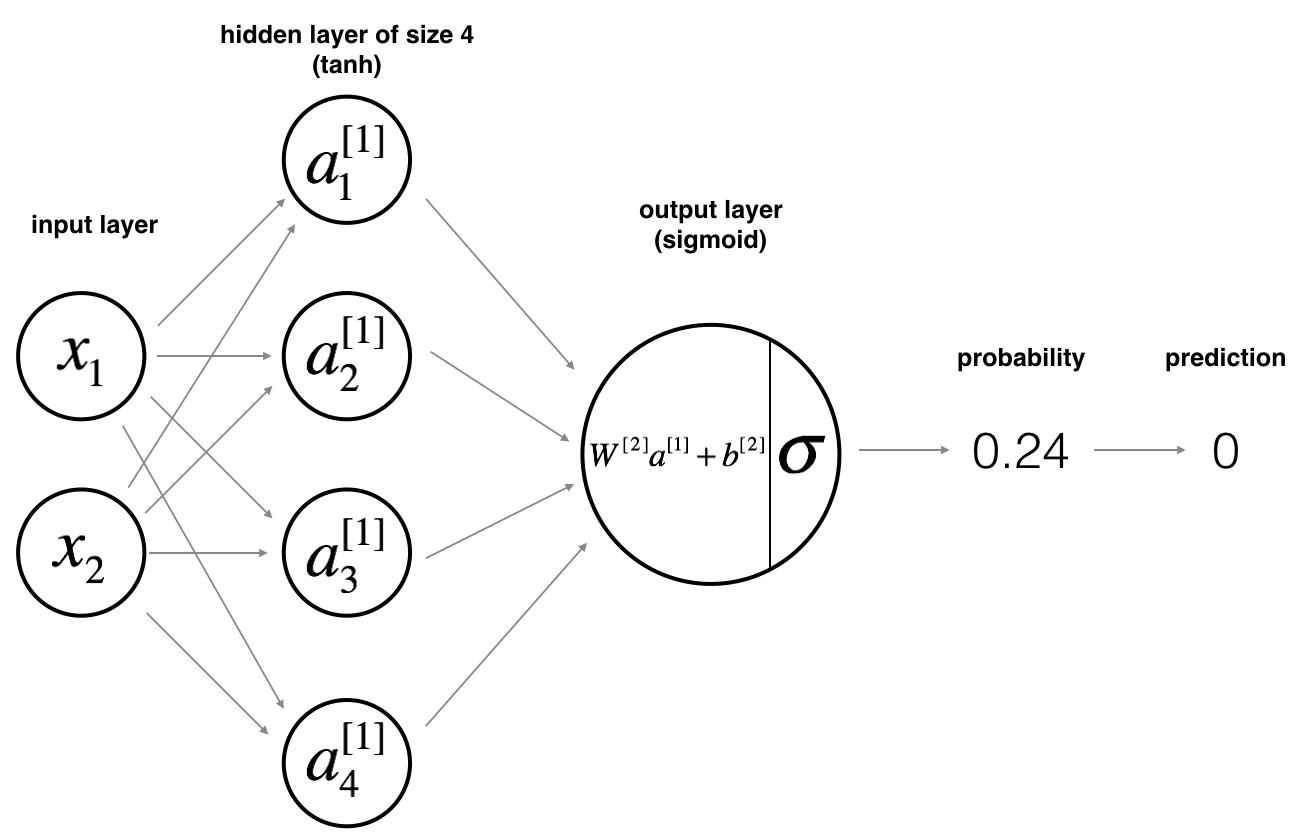

Equations used:

$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

In [88]:
#----- Import libraries ------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [89]:
#----- Testing our model -----
from sklearn.datasets import load_breast_cancer


# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Select only the first two columns of X


X_new = X.reshape(30,569)
y_new = y.reshape(1,569)

# Print the shape of X to confirm that it has only 2 features
print(X_new.shape)
print("Shape of y:", y_new.shape)

(30, 569)
Shape of y: (1, 569)


In [90]:
#----- Essential Functions ------

def layer_sizes(X,Y):
  n_x = X.shape[0]
  n_h = 4
  n_y = Y.shape[0]

  return(n_x,n_h,n_y)
  
def initial_parameters(n_x,n_h,n_y):
  # This function is to initialize the parameters used in the neural network and list them in a dictionary.
  # Multiply the wieghts by a small number for symmetry-breaking and to give a better accuracy
  W1 = np.random.randn(n_h, n_x) * 0.01
  b1 = np.zeros((n_h,1))
  W2 = np.random.randn(n_y, n_h) * 0.01
  b2 = np.zeros((n_y, 1))

  parameters = {
      'W1': W1,
      'b1': b1,
      'W2': W2,
      'b2': b2,
  }

  return parameters


In [91]:
# Function describing the sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

  

def forward_propagation(X, parameters):
  # Feed the inputs into the activation functions and generate an output
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']

  Z1 = np.dot(W1, X) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)


  cache = {
      'Z1': Z1,
      'A1': A1,
      'Z2': Z2,
      'A2': A2
  }

  return A2, cache

In [92]:
def compute_cost(A2, Y):
  m = Y.shape[1] # number of samples
  logs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2), 1 - Y)
  cost = -1/m * np.sum(logs)
  cost = float(np.squeeze(cost))

  return cost


In [93]:
def backward_propagation(parameters, cache, X, Y):
  m = X.shape[1] # number of samples

  # Assign variables from previous functions
  W1 = parameters['W1']
  A1 = cache['A1']
  W2 = parameters['W2']
  A2 = cache['A2']

  
  dZ2 = A2 - Y
  dW2 = (1/m) * np.dot(dZ2, A1.T)
  db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
  dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
  dW1 = (1/m) * np.dot(dZ1, X.T)
  db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)


  # Store variables into gradients dictionary to be accessed easily. 
  gradients = {
      'dW1': dW1,
      'db1': db1,
      'dW2': dW2,
      'db2': db2
  }

  return gradients


In [107]:
def update_parameters(parameters, gradients, learning_rate = 0.001):

  # Remember the parameters from previous function
  W1 = parameters['W1']
  dW1 = gradients['dW1']
  b1 = parameters['b1']
  db1 = gradients['db1']
  W2 = parameters['W2']
  dW2 = gradients['dW2']
  b2 = parameters['b2']
  db2 = gradients['db2']

  # Update the parameters
  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2

  parameters = {
      'W1': W1,
      'b1': b1,
      'W2': W2,
      'b2': b2
  }

  return parameters


In [108]:
def model(X, Y, n_h, num_iterations = 10000, print_cost=False):
  n_x = layer_sizes(X,Y)[0]
  n_y = layer_sizes(X,Y)[2]

  parameters = initial_parameters(n_x,n_h,n_y)

  for i in range(0, num_iterations):
    A2, cache = forward_propagation(X, parameters)
    cost = compute_cost(A2,Y)
    gradients = backward_propagation(parameters, cache, X, Y)
    parameters = update_parameters(parameters, gradients)


    if print_cost and i % 1000 == 0:
      print('Cost after iteration %i: %f' %(i, cost))

  return parameters
  

In [109]:
def predict(parameters, X):
  A2, cache = forward_propagation(X, parameters)
  predictions = (A2 > 0.5)

  return predictions

In [110]:
parameters = model(X_new, y_new, n_h = 4, num_iterations = 10000, print_cost=True)

Cost after iteration 0: 0.693578
Cost after iteration 1000: 0.671520
Cost after iteration 2000: 0.656200
Cost after iteration 3000: 0.649022
Cost after iteration 4000: 0.643232
Cost after iteration 5000: 0.638357
Cost after iteration 6000: 0.635841
Cost after iteration 7000: 0.634225
Cost after iteration 8000: 0.633045
Cost after iteration 9000: 0.632148


In [111]:
predictions = predict(parameters, X_new)
print ('Accuracy: %d' % float((np.dot(y, predictions.T) + np.dot(1 - y, 1 - predictions.T)) / float(y.size) * 100) + '%')

Accuracy: 67%
